# Medical Cost Personal Insurance

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [16]:
df.shape

(1338, 7)

In [12]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

# Data Frame Description

The above data set contains the data of medical cost of personal insurance.The data set contains the columns such like 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'.on the basis of data set the target is to predict the charges. 

checking the null values

In [14]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

observations:In the above data there is no null values

In [17]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [19]:
df.describe().all()

age          True
bmi          True
children    False
charges      True
dtype: bool

# EDA-Exploring Data Variable

In [20]:
df.charges.unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

# Visualization of data

For the categorical data we will use countplot as it will give the frequency of the classes of the columns.

male      676
female    662
Name: sex, dtype: int64


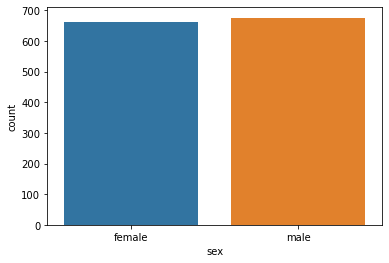

In [22]:
ax=sns.countplot(x='sex',data=df)
print(df['sex'].value_counts())

Observations:From the above observations that total number of male is 676 and total number of female is 662.

no     1064
yes     274
Name: smoker, dtype: int64


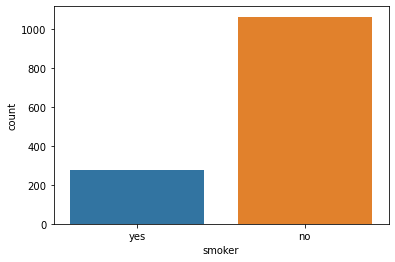

In [25]:
ax=sns.countplot(x='smoker',data=df)
print(df['smoker'].value_counts())

Observations: From the above observations that total number of person who are smoking is 274 and not smoking person is 1064.

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


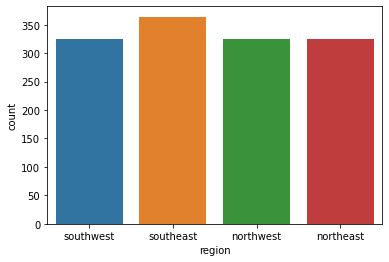

In [26]:
ax=sns.countplot(x="region",data=df)
print(df['region'].value_counts())

Observations: From the above observations that  we will see the benificiary's residential area in the US total number of southeast is 364,total number of southwest is 325, total number of northwest is 325 and total number of northeast is 324.

Cheaking the distribution of the continous value of the flot type columns.

<AxesSubplot:xlabel='age', ylabel='Density'>

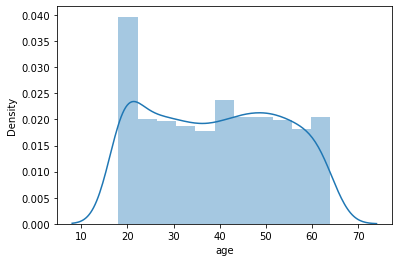

In [28]:
sns.distplot(df['age'],kde=True)

<AxesSubplot:xlabel='bmi', ylabel='Density'>

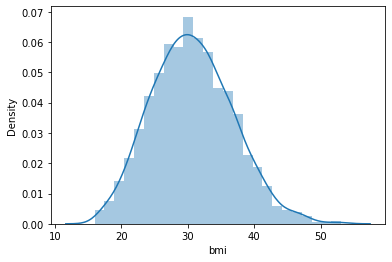

In [29]:
sns.distplot(df['bmi'],kde=True)

<AxesSubplot:xlabel='children', ylabel='Density'>

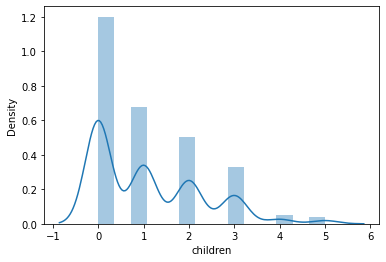

In [30]:
sns.distplot(df['children'],kde=True)

<AxesSubplot:xlabel='charges', ylabel='Density'>

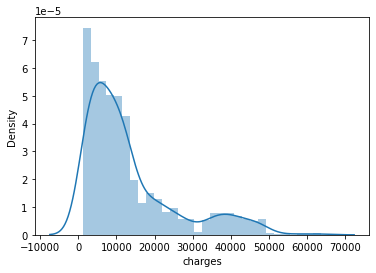

In [31]:
sns.distplot(df['charges'],kde=True)

Visualization part is completed.

# Encoding of dataframe

Since the dataset has a lot of string values we will use the encoding techiques to convert the string data to numerical row.

In [34]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [36]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
        

In [37]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [38]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [39]:
import matplotlib.pyplot as plt

<AxesSubplot:>

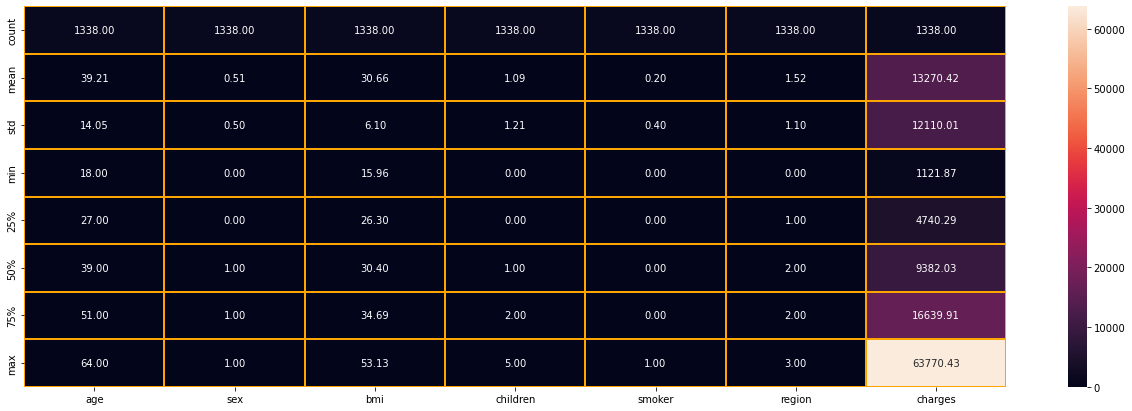

In [43]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='orange',fmt='0.2f')

# check correaltion

In [44]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot:>

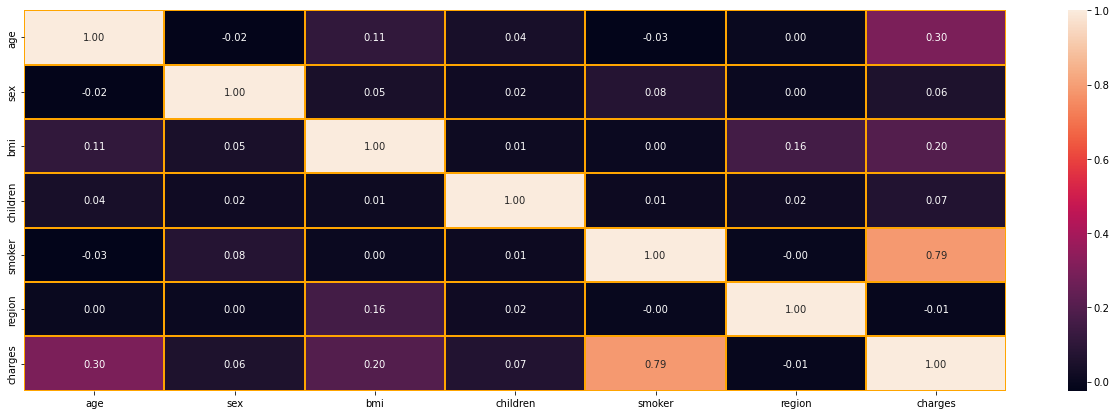

In [47]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='orange',fmt='0.2f')

checking the colums which are positively and negatively correalted with the target columns.

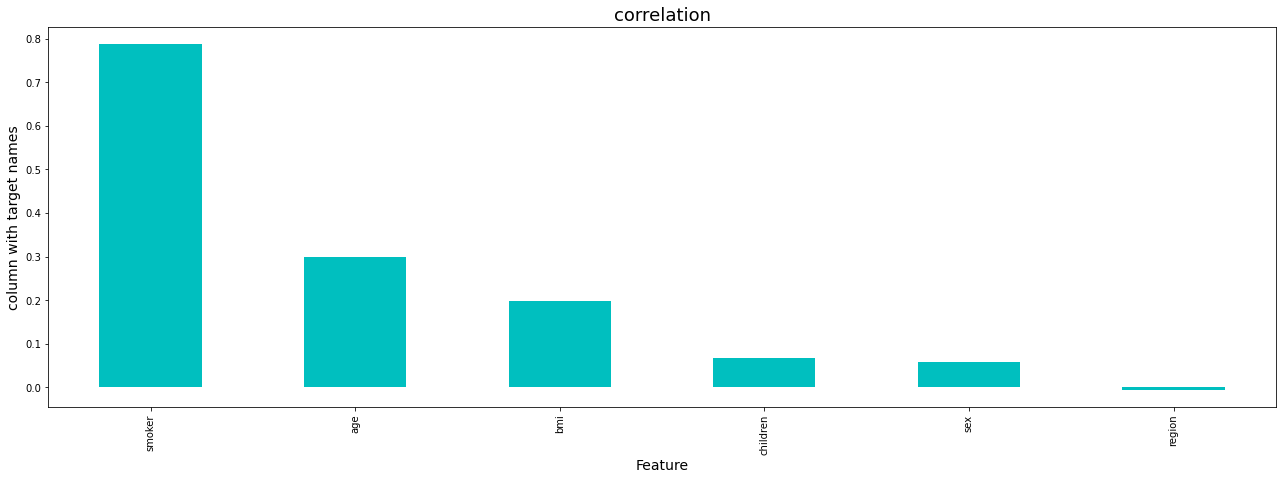

In [51]:
plt.figure(figsize=(22,7))
df.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [54]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

Keeping+/-0.5 as the range for skewness here are childern and smoker the 2 columns which does not lie within this range. and charges is the target variable


preprocessing

spliting the independent & target varibles in x and y before removing skewness

In [55]:
x=df.drop('charges',axis=1)
y=df['charges']

In [56]:
x

,age,sex,bmi,children,smoker,region
0,19,0.0,27.900,0,1.0,3.0
1,18,1.0,33.770,1,0.0,2.0
2,28,1.0,33.000,3,0.0,2.0
3,33,1.0,22.705,0,0.0,1.0
4,32,1.0,28.880,0,0.0,1.0
...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0
1334,18,0.0,31.920,0,0.0,0.0
1335,18,0.0,36.850,0,0.0,2.0
1336,21,0.0,25.800,0,0.0,3.0


In [57]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [59]:
x.skew().sort_values(ascending=False)

smoker      1.464766
children    0.938380
bmi         0.284047
age         0.055673
sex        -0.020951
region     -0.038101
dtype: float64

In [64]:
#powertransformer method
from sklearn.preprocessing import power_transform,PowerTransformer
pt=PowerTransformer()
x_new_pt=pt.fit_transform(x)
x_new_pt

array([[-1.5245286 , -1.0105187 , -0.40991893, -1.07489341,  1.97058663,
         1.28813933],
       [-1.61653885,  0.98959079,  0.54895447,  0.30046837, -0.5074631 ,
         0.48197165],
       [-0.76287039,  0.98959079,  0.42860259,  1.36745234, -0.5074631 ,
         0.48197165],
       ...,
       [-1.61653885, -1.0105187 ,  1.01609224, -1.07489341, -0.5074631 ,
         0.48197165],
       [-1.34558171, -1.0105187 , -0.77909793, -1.07489341, -0.5074631 ,
         1.28813933],
       [ 1.46574343, -1.0105187 , -0.21069427, -1.07489341,  1.97058663,
        -0.40383063]])

In [65]:
#numpy array
x_new=power_transform(x)
x_new

array([[-1.5245286 , -1.0105187 , -0.40991893, -1.07489341,  1.97058663,
         1.28813933],
       [-1.61653885,  0.98959079,  0.54895447,  0.30046837, -0.5074631 ,
         0.48197165],
       [-0.76287039,  0.98959079,  0.42860259,  1.36745234, -0.5074631 ,
         0.48197165],
       ...,
       [-1.61653885, -1.0105187 ,  1.01609224, -1.07489341, -0.5074631 ,
         0.48197165],
       [-1.34558171, -1.0105187 , -0.77909793, -1.07489341, -0.5074631 ,
         1.28813933],
       [ 1.46574343, -1.0105187 , -0.21069427, -1.07489341,  1.97058663,
        -0.40383063]])

In [81]:
pd.DataFrame(x_new,columns=x.columns).skew().sort_values(ascending=False)

smoker      1.464766
children    0.105254
bmi        -0.006617
sex        -0.020951
age        -0.100193
region     -0.172450
dtype: float64

In [82]:
x=pd.DataFrame(x_new,columns=x.columns)

In [83]:
x.skew().sort_values(ascending=False)

smoker      1.464766
children    0.105254
bmi        -0.006617
sex        -0.020951
age        -0.100193
region     -0.172450
dtype: float64

In [84]:
sk=x.skew()
sk

age        -0.100193
sex        -0.020951
bmi        -0.006617
children    0.105254
smoker      1.464766
region     -0.172450
dtype: float64

In [85]:
np.abs(3)

3

In [86]:
np.abs(-3)

3

In [87]:
np.abs(sk)

age         0.100193
sex         0.020951
bmi         0.006617
children    0.105254
smoker      1.464766
region      0.172450
dtype: float64

# Outliers check

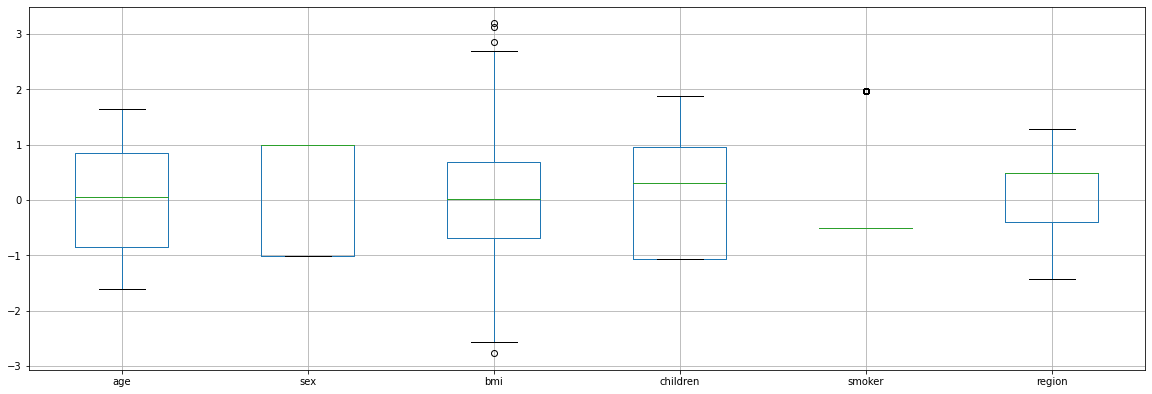

In [88]:
x.iloc[:,:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

# Removing the outliers

In [79]:
df.shape

(1338, 7)

In [80]:
from scipy.stats import zscore

In [89]:
z=np.abs(zscore(df))

In [90]:
thereshold=3

In [91]:
np.where(z>3)

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
         640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
        1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64),
 array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
        3, 6, 6, 3, 3, 6, 2], dtype=int64))

In [92]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [93]:
df_new_z

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


percentage of data loss

In [95]:
Data_loss=((1338-1309)/1338)*100
Data_loss

2.167414050822123

scaling the data using min-max scalar

In [108]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
lr=LinearRegression()
from sklearn.model_selection import train_test_split

In [105]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_lr=lr.predict(x_test)
    print('Predicated result price',pred_lr)
    print('Actual price',y_test)

Predicated result price [ 1.12926245e+04  1.01736762e+04  3.80663495e+04  1.56712451e+04
  6.29574825e+03  3.96355911e+03  1.27322806e+03  1.41777325e+04
  9.14925898e+03  7.61238529e+03  4.22765354e+03  1.03717490e+04
  9.15182582e+03  4.23581471e+03  2.79598341e+04  1.09763438e+04
  1.07829508e+04  6.49995481e+03  8.59825527e+03  2.69698585e+04
  3.36040263e+04  1.42660783e+04  1.17486656e+04  3.24966178e+04
  4.39903627e+03  9.65911079e+03  6.25064830e+02  1.02638137e+04
  4.24015943e+03  1.07008466e+04  9.12158836e+03  4.00107174e+04
  1.50216755e+04  1.35100365e+04  2.44378978e+04  5.39590864e+03
  1.30566475e+04  3.09399042e+04  3.38341455e+04  3.38284029e+03
  3.86660193e+03  4.46898578e+03  3.07077706e+04  3.91991547e+04
  2.76716679e+04  5.08982464e+03  1.08604194e+04  8.20116597e+03
  3.85178313e+03  1.04403048e+04  5.70246348e+03  3.06937205e+03
  3.31931744e+04  3.82766465e+04  1.57853948e+04  7.29835569e+03
  6.09261010e+03  9.39062437e+03  8.65178886e+03  1.14801779e+04
 

Predicated result price [ 3.23875992e+03  9.81676413e+03  7.49494561e+03  6.96738874e+03
  2.74855965e+03  1.59155714e+04  1.29934996e+04  5.11637993e+03
  3.21894322e+04  2.87900211e+04  9.21475610e+03  1.04076887e+04
  3.59682129e+03  6.86364324e+03  7.81407499e+03  7.48352270e+03
  3.36426665e+04  2.99679153e+04  1.46707170e+04 -4.64583635e+00
  7.46877002e+03  5.95568565e+03  2.88159616e+04  1.44642721e+04
  4.03872089e+04  2.91091670e+04  3.37133568e+04  2.67662250e+03
  1.10845442e+04  1.55148781e+04  1.26157840e+04  2.84983676e+04
  3.01408875e+03  7.56616531e+03  3.72020470e+04  2.64677548e+04
  6.96190330e+03  1.12206952e+04  3.64142881e+04  4.52148172e+03
  8.45700790e+03  1.75778129e+04  1.11470570e+04  8.87231583e+03
  1.09154183e+03  5.94997723e+03  1.55208911e+04  5.94440377e+03
  2.10284856e+03  1.11536751e+04  3.33920414e+04  3.42436298e+04
  8.11529267e+03  1.02113612e+04  1.42887941e+04  5.58101693e+03
  8.07157164e+03  3.38463335e+04  1.67795784e+04  3.33611655e+03
 

Predicated result price [11941.61569113  7525.39617882 14878.65810039 31153.44427877
 32881.61486903  2850.17042656 12555.27221258  8835.79179935
 14013.54656238 10798.98980117  6568.53025982  7877.83275544
 -2915.06686757 32439.24081651  5866.32020251 15825.08292614
 11605.85744337 13134.46254034  4485.41976829 28548.64807556
 11416.73420054 28112.19200633  9467.69874598 13425.54332426
  6318.13940899 14423.11293123 10653.20613927 14806.21386985
  3662.37489667 13977.42698723  9694.90956937 27231.3961147
 32321.59469226 11314.72912408  3063.95646292 35843.1345296
  9801.82813126 30021.98503622 11532.17874097 12615.26338072
 35819.77337011 34753.48924974  4525.5876418   6461.82894503
 31436.19994491 11456.56888111 11855.60223345 36765.69978515
 37186.42336231  3169.99884147   384.82048533 14628.78379046
 33275.70019846 12904.48743478 11975.84240082  7292.3436652
 15941.61088915 36534.48600943  6968.23708965 23737.15654749
 13167.44765188 11212.85120146 11334.73528846 32875.45979358
 25

Actual price 1130     8582.30230
62      30166.61817
830     13393.75600
42       6272.47720
1202     2055.32490
           ...     
1106     8988.15875
309      7749.15640
1285     8534.67180
126     17081.08000
639     12949.15540
Name: charges, Length: 268, dtype: float64
Predicated result price [ 7128.30993909 12955.56695067  4319.31392272 12183.40111863
 29478.79575549  9065.42713621 14701.07423266   148.64206315
 35557.99704208  9194.35522429 13236.2596432  11062.75723613
  6246.81472588 36536.33456559 16683.38190208 10008.451603
 12072.89406571  7783.92770855  7904.76118955  4976.94471409
 30059.09079314  9301.4779847  39296.38206211  8327.98560945
  6054.94844443 11901.74776122 15915.06219561 14840.51423326
 11872.78788543   102.33222285 36341.89140507  7932.99648783
  3863.48013037  2356.66161795  6004.82160506  -298.55735682
  6576.63286654  6572.49131215 31254.82149564 10379.50820542
 13128.34470227  5944.87503109  6258.00858359 10075.4665648
  4744.6037055  23345.86947153  

Predicated result price [ 4164.0851604   7136.02171912  5849.57979976  5468.30312617
  2376.68991073  5866.6084723  29988.17975757 11904.73574439
 12140.7588921   8902.45686893 13575.91867664   834.95735507
  5062.3517028   2194.62415879 11503.67512127 12904.32242868
 11319.78586603 27955.37446315  9574.60618559 11821.82527335
  8044.9871045  14399.78198657 10574.75840216  8386.35131876
  8927.02172783   496.21574652  3611.17127421 14472.52143855
  1598.07271626  5692.32054727 28167.53153083  4594.46938108
  2529.92754485  8127.90327542 -1647.31424662 11672.40916432
  3606.63489707  2364.10476857 10657.02680285 34759.01607653
  5528.2394365   6511.61672857 10044.34739694 24873.29186821
 34447.8077367   9756.83621746 11067.60894308 -2390.77300743
 34026.61877725  6209.82134106  8766.3681398   6618.5116452
  -610.99746066 11252.38363848 12931.76978544  4699.14230721
 13150.35864892 14748.24617732 11273.45985129 13980.21775568
 13345.85624408  2162.76674577 10293.10318934 35678.18232624
 

  1.02352942e+04  3.12000271e+03  1.28438105e+04  7.50357160e+03]
Actual price 473     20878.78443
708      6113.23105
430     23082.95533
192      2137.65360
1272    14478.33015
           ...     
991      7144.86265
1225     4795.65680
525     11482.63485
806     28476.73499
1224     6858.47960
Name: charges, Length: 268, dtype: float64
Predicated result price [ 7934.63218704 11862.29049282  1195.46385005 37653.36969576
 12592.36773622 14190.80120533  7959.4589859   9861.90534779
  9903.44451012 37401.49211719 29502.49690894 32489.28440681
 13985.44421684  6208.38752365 10644.01222335 13939.84172695
 37145.83091638 11487.96668195   829.24989726 12039.32170822
  5935.69345141  6202.39066119  3329.5899292   9410.23839275
 11939.81593487 11021.93663238 32845.09789072 10824.975482
 14169.71184197 15077.85203386 11811.52789903 12648.04612737
  5163.77617431 10921.56932417  6756.77271124 39544.24880878
  6193.57260257  2024.59209957  8037.97224695 -2275.96671101
 11771.01132179  9428.7973

Predicated result price [ 5935.81966212 14086.96494649 10918.0641073   8655.56253198
 11202.48827634 22672.22070885 33807.60534556 29736.83151523
  5633.02890013 15322.73055243  8625.4858809  13741.67454816
  5658.96839391 16388.10666502  2572.35733975 14459.56076928
 27875.63571021 15290.43466625 14877.6398453  15822.50284589
  5597.60637189  9229.42040723  6427.44119322  7429.20586685
 33028.97376973 23030.32630826  8141.65179507  6738.27194863
  6875.21182319  2708.76577298  5334.94902364  5905.63907402
 12001.53923357 12989.24764735 29489.76836108 14946.24623341
 11979.88008612 10588.97087165 30778.91711831 25945.43312863
  6708.47402709 22753.31099653 10604.84702045  3507.37630109
 33744.87191271  6808.99937039  9859.35728571  2531.46645043
  3199.04837969 12681.3214098  29476.28176765  6698.6816831
  2752.48790708 11223.01124016  8967.11162331 36753.9622143
 14502.39758619 38159.45069139  2300.25925285 11179.73070091
  8056.49576357  7483.8287307  10345.71681376 10269.58759884
 3

Predicated result price [35713.4469485   2349.34968172 33026.50438508 36475.48828471
 30182.40263595 14491.24675689 29862.97820179   693.60354238
 17527.29061807 38460.66541318  8062.0524946   3409.51450273
 15357.09630137  3672.93817112 12565.95860874 35302.31449778
 28833.18748248 14889.91812294  5456.88162251  7703.6433178
 15280.4063295   9772.3789083  39843.3295203  12655.27375143
  4470.65228165 28891.82796721  8773.39777591  -306.14935349
  7132.61946758 10697.74308749 14021.24691832  4919.65831569
 10118.54834326  9084.96859988 10717.70197683  7696.89263444
  4670.49100357 13239.93792344  4565.15599859 14782.99147876
 12327.48196912 12478.27802236 14328.76917606  6925.90492539
  4599.76259974  8532.81648416 11679.47371891  9620.97993355
  4481.45745065  1763.58848455  8446.74444089 22566.33884475
 10430.31062376  6552.12012566  8552.98089916  8338.9778865
 33524.19521824  9935.64386818  1971.57947011  6623.83967088
  9010.71829669 26908.84647701  8654.44315279  2462.22455854
  

Actual price 1238     6985.50695
336     12142.57860
769      6933.24225
733      9447.25035
220      5012.47100
           ...     
1052     9288.02670
424      8968.33000
587     43943.87610
298     38746.35510
171      8116.68000
Name: charges, Length: 268, dtype: float64
Predicated result price [34913.53169421  1649.78689862 12842.6873492  16279.85833262
 13223.07295256 12981.99475011  3528.55443401 26972.87465949
 31813.37135708 10322.48955477 11988.91365415  3411.90425113
  8808.99068419 16612.62405699  6285.50764092 13719.64394643
 27469.18433742 12198.90682104 29404.15467682  7532.2486181
 37651.10433482  2624.73352675 32440.67168526 32697.63933475
 11598.31004911 10919.55019728  4213.69319013 31222.83834668
 34375.45038931 13487.88293691 26926.45623005 -2645.80117952
  6111.98854764  1703.49643538  9900.34432686 10171.41655607
 26892.49895865  3011.63566181 29684.50729241  3897.95972409
 33305.86796712  9490.07391152 10922.52316142 27736.39031963
 10711.34596115  4118.87605243

In [109]:
print('mean absolute error:',mean_absolute_error(y_test,pred_lr))
print('mean squared error:',mean_squared_error(y_test,pred_lr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_lr)))

mean absolute error: 4335.2891600983085
mean squared error: 36675626.700933255
Root mean squared error: 6056.040513481829


In [112]:
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print(r2_score(y_test,pred_lr))

0.7084917161806991


# Cross valdation of the model

In [113]:
train_accurancy=r2_score(y_train,pred_train)
test_accurancy=r2_score(y_test,pred_test)

In [114]:
from sklearn.model_selection import cross_val_score


In [118]:
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'at cross fold{j}the cv score is{cv_mean}and accurancy score for training is {train_accurancy}and accurancy for the testing is {test_accurancy}')
    print('\n')

at cross fold2the cv score is0.7469073402087719and accurancy score for training is -0.7956156417131757and accurancy for the testing is -0.7617309340027199


at cross fold3the cv score is0.7433665149735263and accurancy score for training is -0.7956156417131757and accurancy for the testing is -0.7617309340027199


at cross fold4the cv score is0.7451208294254525and accurancy score for training is -0.7956156417131757and accurancy for the testing is -0.7617309340027199


at cross fold5the cv score is0.7456327075683657and accurancy score for training is -0.7956156417131757and accurancy for the testing is -0.7617309340027199


at cross fold6the cv score is0.744467430046539and accurancy score for training is -0.7956156417131757and accurancy for the testing is -0.7617309340027199


at cross fold7the cv score is0.7438168803625758and accurancy score for training is -0.7956156417131757and accurancy for the testing is -0.7617309340027199


at cross fold8the cv score is0.7417041651506672and accuranc

since the number of folds don't have such impact on the accurancy and cv_score,so cv=5 is selected here we have handled the problem of the overfitting and the underfitting by checking the training and testing score

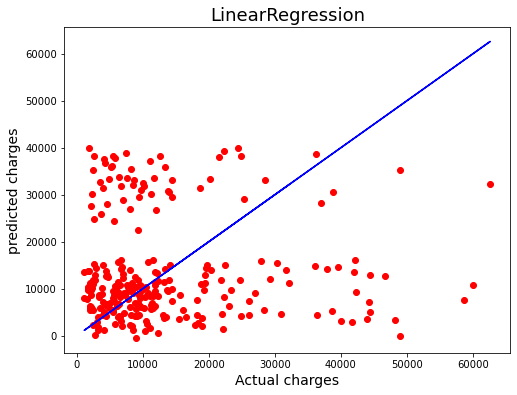

In [124]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('predicted charges',fontsize=14)
plt.title('LinearRegression',fontsize=18)
plt.savefig('lr.png')
plt.show()

# Regularization

In [126]:
from sklearn.model_selection import  GridSearchCV
from sklearn.linear_model import Lasso

In [130]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],
           'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [134]:
#final model training
ls=Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100


75.87099394871659

In [137]:
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss*100

70.83562822587052

In [138]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

74.56794770676784

# Ensemble technique

In [142]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],
           'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [146]:
rf=RandomForestRegressor(criterion= 'mae', max_features='sqrt')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('R2score:',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)


R2score: 82.32934581719098
cross val score: 84.05751372739489


observations: We are getting model accurancy and cross valadtion score is 82.3% and 84.05% respectively.which shows our model perform vey well. 

In [147]:
import pickle

In [148]:
filename='Insurance charges'
pickle.dump(rf,open(filename,'wb'))

# conclusion:

In [150]:
loaded_model=pickle.load(open('Insurance charges','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

82.32934581719098


In [154]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['predicted','original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,258,259,260,261,262,263,264,265,266,267
predicted,9261.227621,3337.730989,22497.015098,9200.213228,3284.999673,4582.753477,4422.520111,13414.819095,6740.187205,39212.160329,...,5203.826278,41398.983343,12932.310138,12396.506014,6689.835589,23476.188735,5300.329188,12597.898786,13986.254498,13590.114598
original,9261.227621,3337.730989,22497.015098,9200.213228,3284.999673,4582.753477,4422.520111,13414.819095,6740.187205,39212.160329,...,5203.826278,41398.983343,12932.310138,12396.506014,6689.835589,23476.188735,5300.329188,12597.898786,13986.254498,13590.114598
